<a href="https://www.kaggle.com/aerospacer/iris-dataset-exploratory-data-analysis-eda?scriptVersionId=84327591" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## IRIS Dataset EDA ##

In [1]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns



sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


In [2]:
#load IRIS Dataset

iris_df = pd.read_csv("../input/iriscsv/iris.csv")
iris_df = iris_df.rename(columns={"variety" : "species"})

In [3]:
iris_df.shape
print(iris_df.head())


   sepal.length  sepal.width  petal.length  petal.width species
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris_df.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
species          object
dtype: object

In [6]:
#statistics for numeric columns
iris_df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# No of duplicates in the dataset
iris_df.duplicated().sum() 

1

In [8]:
iris_df[iris_df.duplicated()] #This shows the actual duplicate rows

,sepal.length,sepal.width,petal.length,petal.width,species
142,5.8,2.7,5.1,1.9,Virginica


In [9]:
#Checking the balance of dataset
iris_df['species'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: species, dtype: int64

In [10]:
#Checking missing values
iris_df.isnull().sum(axis=0)

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
species         0
dtype: int64

In [11]:
#Estimating Skewness and Kurtosis
iris_df.skew()
iris_df.kurt()

sepal.length   -0.552064
sepal.width     0.228249
petal.length   -1.402103
petal.width    -1.340604
dtype: float64

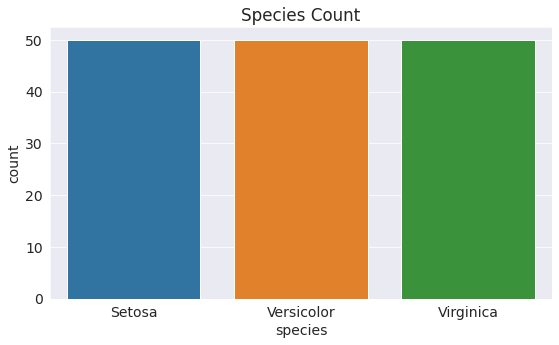

In [12]:
#Starting showing plots
plt.title('Species Count')
sns.countplot(iris_df['species']);

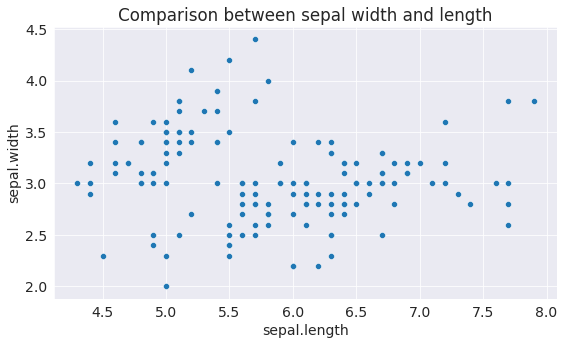

In [13]:
plt.title('Comparison between sepal width and length')
sns.scatterplot(iris_df['sepal.length'], iris_df['sepal.width']);

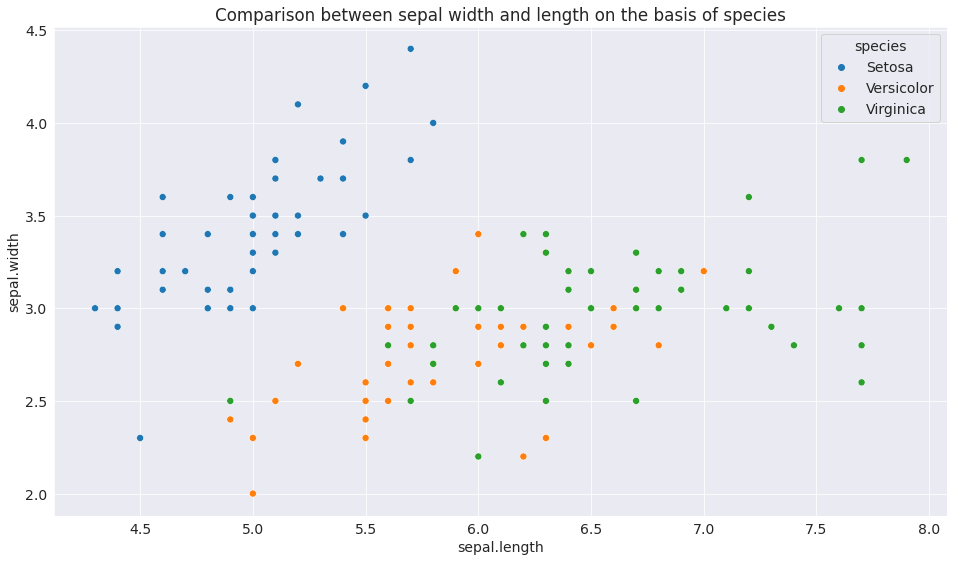

In [14]:
plt.figure(figsize=(16,9))
plt.title('Comparison between sepal width and length on the basis of species')
sns.scatterplot(iris_df['sepal.length'], iris_df['sepal.width'], hue = iris_df['species'], s= 50);

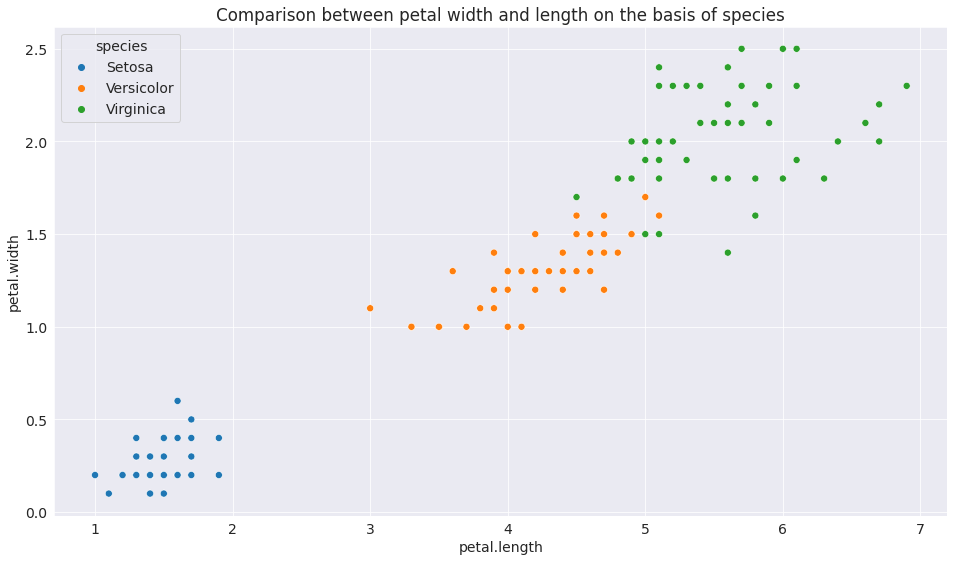

In [15]:
plt.figure(figsize=(16,9))
plt.title('Comparison between petal width and length on the basis of species')
sns.scatterplot(iris_df['petal.length'], iris_df['petal.width'], hue = iris_df['species'], s= 50);

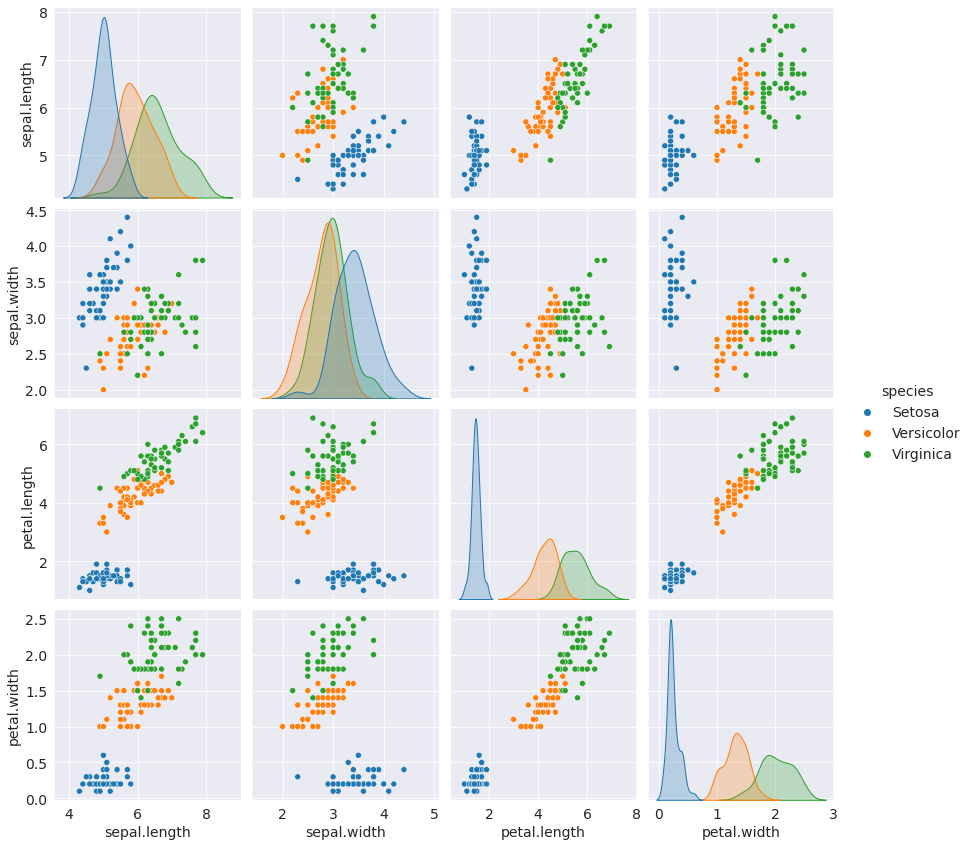

In [16]:
#Visualize all the columns relationship
sns.pairplot(iris_df,hue="species",height=3);


In [17]:
#Correlation Between Variables
iris_df.corr()

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


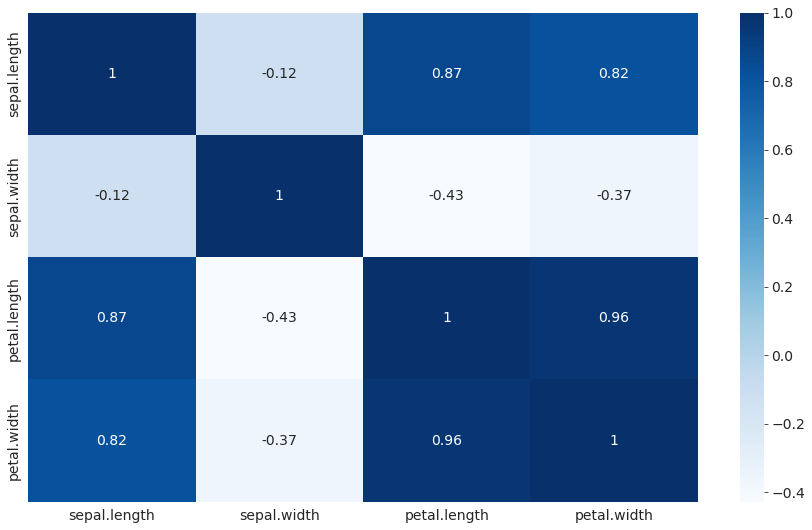

In [18]:
fig = plt.figure(figsize = (15,9))
sns.heatmap(iris_df.corr(), cmap='Blues', annot = True);

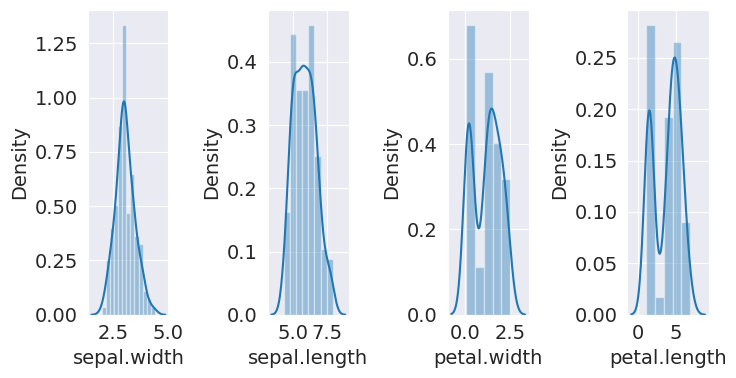

In [19]:
cols = ['sepal.width', 'sepal.length', 'petal.width', 'petal.length']
plt.figure(figsize=(20,4), dpi=100)
i = 1
for col in cols:
    plt.subplot(1,11,i)
    sns.distplot(iris_df[col])
    i = i+1
plt.tight_layout()
plt.show()

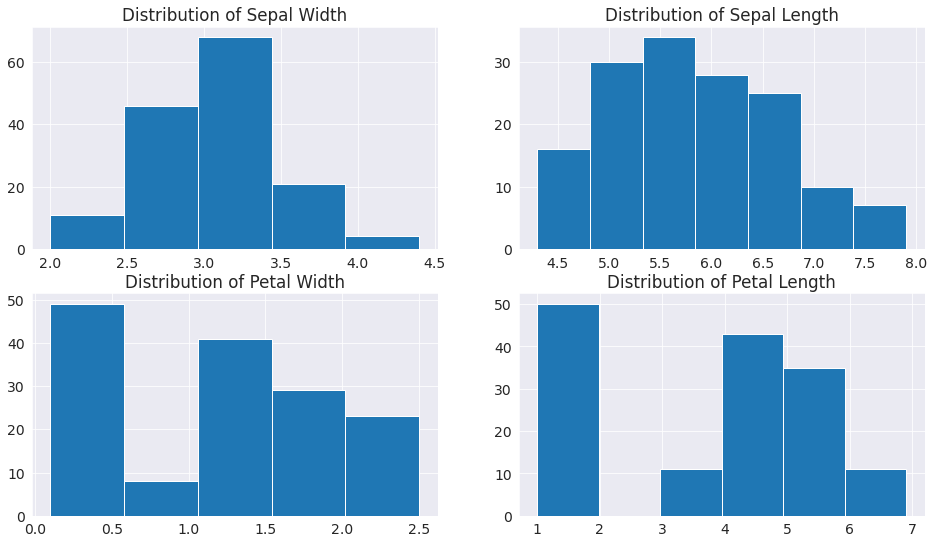

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
axes[0,0].set_title("Distribution of Sepal Width")
axes[0,0].hist(iris_df['sepal.width'], bins=5);
axes[0,1].set_title("Distribution of Sepal Length")
axes[0,1].hist(iris_df['sepal.length'], bins=7);
axes[1,0].set_title("Distribution of Petal Width")
axes[1,0].hist(iris_df['petal.width'], bins=5);
axes[1,1].set_title("Distribution of Petal Length")
axes[1,1].hist(iris_df['petal.length'], bins=6);




The Highest frequency of sepal width is between 3.0 to 3.5 which is around 70.

The Highest frequency of sepal length is between 5.5 and 6.0 which is around 35.

The Highest frequency of petal width is between 0 to 0.5 which is around 50.

The Highest frequency of petal length is between 0 to 0.5 which is around 50.

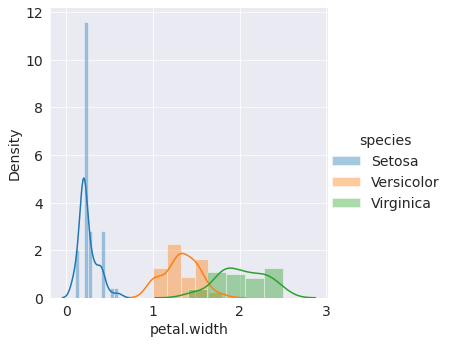

In [21]:
#Univariate Analysis
sns.FacetGrid(iris_df,hue="species",height=5).map(sns.distplot,"petal.width").add_legend();

We see the setosa is easily separable while some portions of Versicolor and virginica are mixed.

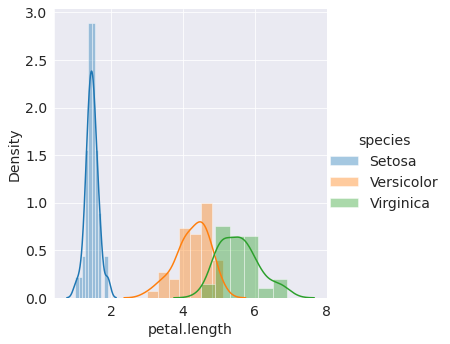

In [22]:
sns.FacetGrid(iris_df,hue="species",height=5).map(sns.distplot,"petal.length").add_legend();

Again we see that on the basis of petal length setosa is separable while the other two are still overlapping.

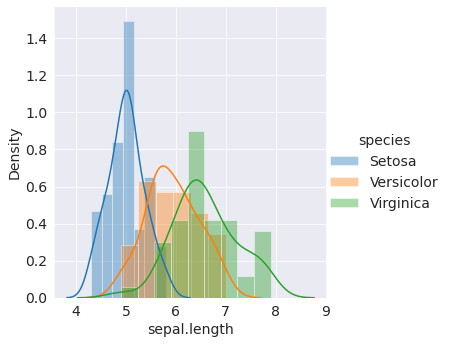

In [23]:
sns.FacetGrid(iris_df,hue="species",height=5).map(sns.distplot,"sepal.length").add_legend();

We see it is quite tough to separate the species on the basis of sepal_length alone.

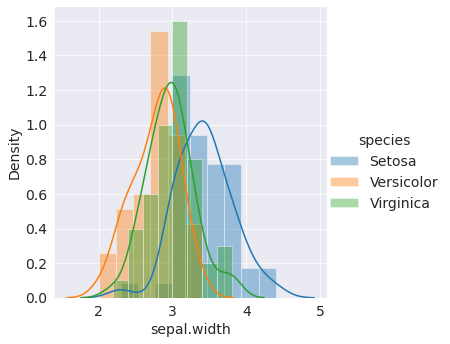

In [24]:
sns.FacetGrid(iris_df,hue="species",height=5).map(sns.distplot,"sepal.width").add_legend();

While the overlapping of species is more intense in the case of sepal_width.


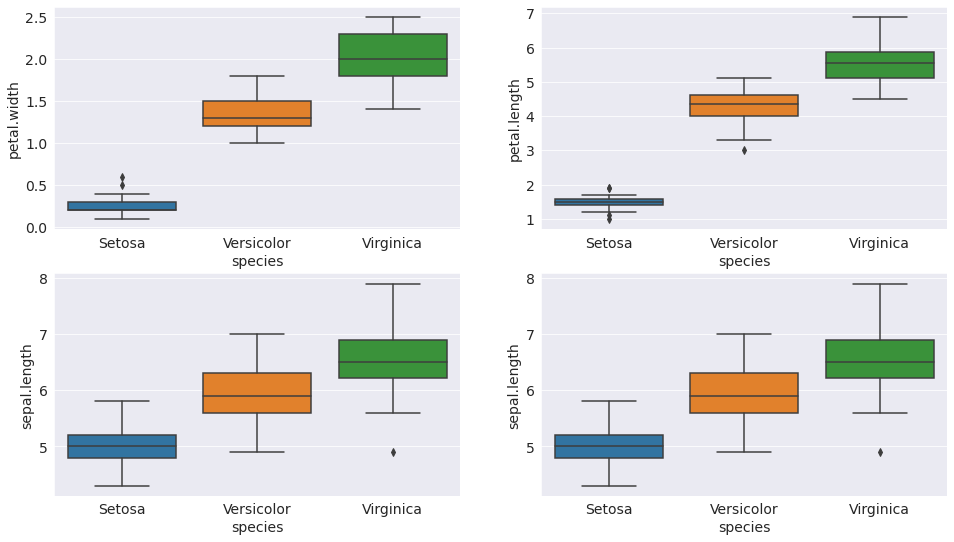

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot(  y="petal.width", x= "species", data=iris_df,  orient='v' , ax=axes[0, 0])
sns.boxplot(  y="petal.length", x= "species", data=iris_df,  orient='v' , ax=axes[0, 1])
sns.boxplot(  y="sepal.length", x= "species", data=iris_df,  orient='v' , ax=axes[1, 0])
sns.boxplot(  y="sepal.length", x= "species", data=iris_df,  orient='v' , ax=axes[1, 1])
plt.show()

Further, we see that the box plots describe that the setosa usually has smaller features with few outliers.

The Versicolor species has average features

The virginica species has the longest features widths and lengths as compared to others.

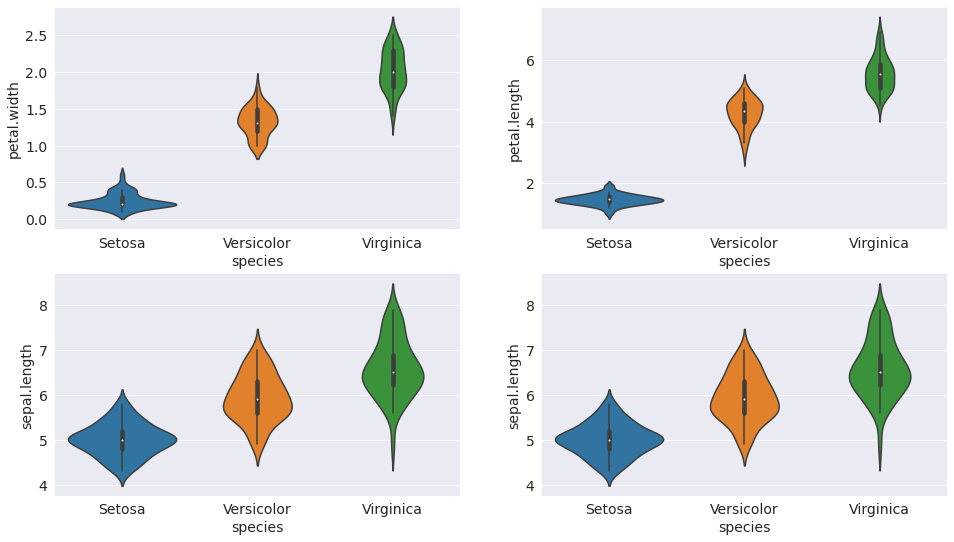

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.violinplot(y="petal.width", x= "species", data=iris_df,  orient='v' , ax=axes[0, 0])
sns.violinplot(y="petal.length", x= "species", data=iris_df,  orient='v' , ax=axes[0, 1])
sns.violinplot(y="sepal.length", x= "species", data=iris_df,  orient='v' , ax=axes[1, 0])
sns.violinplot(y="sepal.length", x= "species", data=iris_df,  orient='v' , ax=axes[1, 1])
plt.show()

The kernel density of the data along with the full distribution of the data is shown through the violin plots. We can see the probability density of the various features

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,NaN,NaN,NaN
sepal.width,-0.117570,1.000000,NaN,NaN
petal.length,0.871754,-0.428440,1.000000,NaN
petal.width,0.817941,-0.366126,0.962865,1.0


<AxesSubplot:>

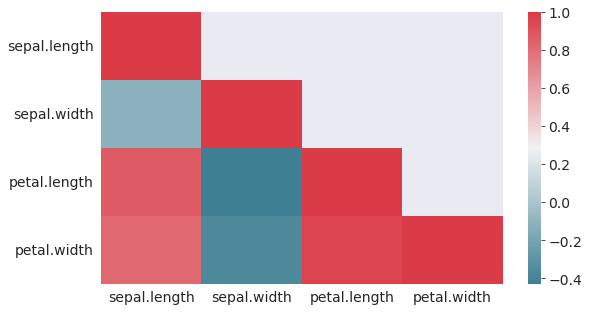

In [27]:
# data without the indexes
dt = iris_df[iris_df.columns[2:]]

# method : {‘pearson’, ‘kendall’, ‘spearman’}
corr = iris_df.corr(method="pearson") #returns a dataframe, so it can be reused

# eliminate upper triangle for readability
bool_upper_matrix = np.tril(np.ones(corr.shape)).astype(np.bool)
corr = corr.where(bool_upper_matrix)
display(corr)
# alternate method: http://seaborn.pydata.org/examples/many_pairwise_correlations.html

# seaborn matrix here
#sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
#            square=True, ax=ax)
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Interpretation

Diagonal values and upper triangle are ignored (melted the upper triangle through np.tril and df.where).Naturally, we find:

a high positive correlation between PetalWidth and PetalLength (0.96)

a high positive correlation between PetalLength and SepalLength (0.87)

a high positive correlation between PetalWidth and SepalLength (0.81)

As such, we observe correlations between these main attributes: PetalWidth, PetalLength and SepalLength.

Theory

PCC is:

1 is total positive linear correlation

0 is no linear correlation

−1 is total negative linear correlation

<AxesSubplot:>

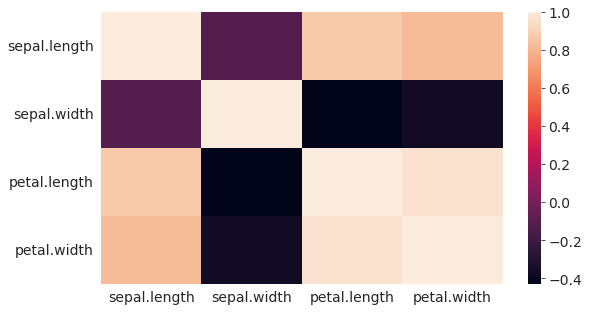

In [28]:
#Correlation matrix

# import correlation matrix to see parametrs which best correlate each other
# According to the correlation matrix results PetalLengthCm and
#PetalWidthCm have possitive correlation which is proved by the plot above


corr = iris_df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


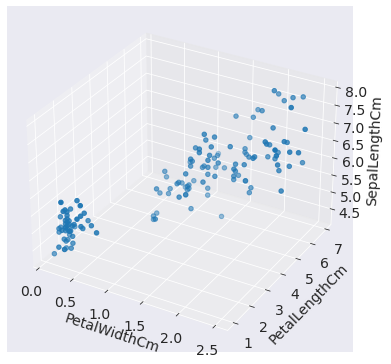

In [29]:
#Check correlation 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = [iris_df["petal.width"], iris_df["petal.length"]]
n = 100
ax.scatter(iris_df["petal.width"], iris_df["petal.length"], iris_df["sepal.length"])


ax.set_xlabel('PetalWidthCm')
ax.set_ylabel('PetalLengthCm')
ax.set_zlabel('SepalLengthCm')

plt.tight_layout(pad=0.5)
plt.show()

#### Conclusion of EDA ####

The dataset is balanced i.e. equal records are present for all three species.

We have four numerical columns while just one categorical column which in turn is our target column.

A strong correlation is present between petal width and petal length.

The setosa species is the most easily distinguishable because of its small feature size.

The Versicolor and Virginica species are usually mixed and are sometimes hard to separate, while usually Versicolor has average feature sizes and virginica has larger feature sizes.